# Communicate Data Findings Project - US Flights on 2018 

## Investigation Overview
The Dataset is about US Flights on 2018 and consist of Delay and Canelled Flights, there are 6,044,346 flights Recordes on 2018 in the dataset with 31 features (Flight Date, Airline, Origin, Destination, cancelled, cancelled Reason, Departure Delay, Arraival Delay time in minutes, Dealy Reasons). Most variables are numeric in nature, but the variables Airline, Origin State,Destination State,Cancellation Reasons are Descriptive.


## Dataset Overview
The data consisted of 6,044,346 flights Recordes and Cancelled flights equals 81545 . The attributes included Airlines, Cancellation Reasons (Weather, Carrier, NAS, Security), Delay Reason, Delay Minutes.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [6]:
# Read 2018.csv flights on 2018 file
df = pd.read_csv('2018.csv')

In [22]:
#set FL_DATE type to date
df_1['FL_DATE']= df_1['FL_DATE'].astype('datetime64')

In [8]:
# Read airlines.csv file
airlines_df = pd.read_csv('airlines.csv')
#join airlines with df datasets using merge
df_1= df.copy()
df_1= pd.merge(df_1, airlines_df, left_on='OP_CARRIER', right_on='IATA_CODE', how='inner')

In [10]:
# Read airports.csv file
airports_df = pd.read_csv('airports.csv')
Origin_airports_df=airports_df.copy()
# rename Columns name to merge it with dataset
Origin_airports_df=Origin_airports_df.rename(columns={"CITY": "ORIGIN_CITY", "STATE": "ORIGIN_STATE"})
#join airports city, state with df datasets using merge
df_1= pd.merge(df_1, Origin_airports_df[['IATA_CODE','ORIGIN_CITY','ORIGIN_STATE']], left_on='ORIGIN', right_on='IATA_CODE', how='inner')

In [11]:
# Read airports.csv file
Dest_airports_df=airports_df.copy()
# rename Columns name to merge it with dataset
Dest_airports_df=Dest_airports_df.rename(columns={"CITY": "DEST_CITY", "STATE": "DEST_STATE"})
#join airports city, state with df datasets using 
df_1= pd.merge(df_1, Dest_airports_df[['IATA_CODE','DEST_CITY','DEST_STATE']], left_on='DEST', right_on='IATA_CODE', how='inner')

In [13]:
#merge Cancellation data
Cancellation_data = [['A', 'Carrier'], ['B', 'Weather'], ['C', 'NAS'],['D', 'Security']] 
  
# Create the pandas Cancellation code df 
Cancellation_df = pd.DataFrame(Cancellation_data, columns = ['CODE', 'CANCELLATION_REASON']) 
df_1= pd.merge(df_1, Cancellation_df, left_on='CANCELLATION_CODE', right_on='CODE', how='left')

In [16]:
#remove unnecessary Columns
df_1.drop(df_1[['Unnamed: 27','IATA_CODE_x','IATA_CODE_y','CODE']],axis=1,inplace=True)

### Distribuation of Cancelled Airlines

Cancelled Flights in the dataset represent 1.4% of 2018 Flights, Southwest Airlines Co have highst number of Cancelled Flights "18275" on 2018 then American Airlines Inc, American Eagle Airlines Inc, and Skywest Airlines Inc airlines Respectively, and the least Airline's cancelled flights are Hawaiian Airlines Inc "250", then Virgin America.

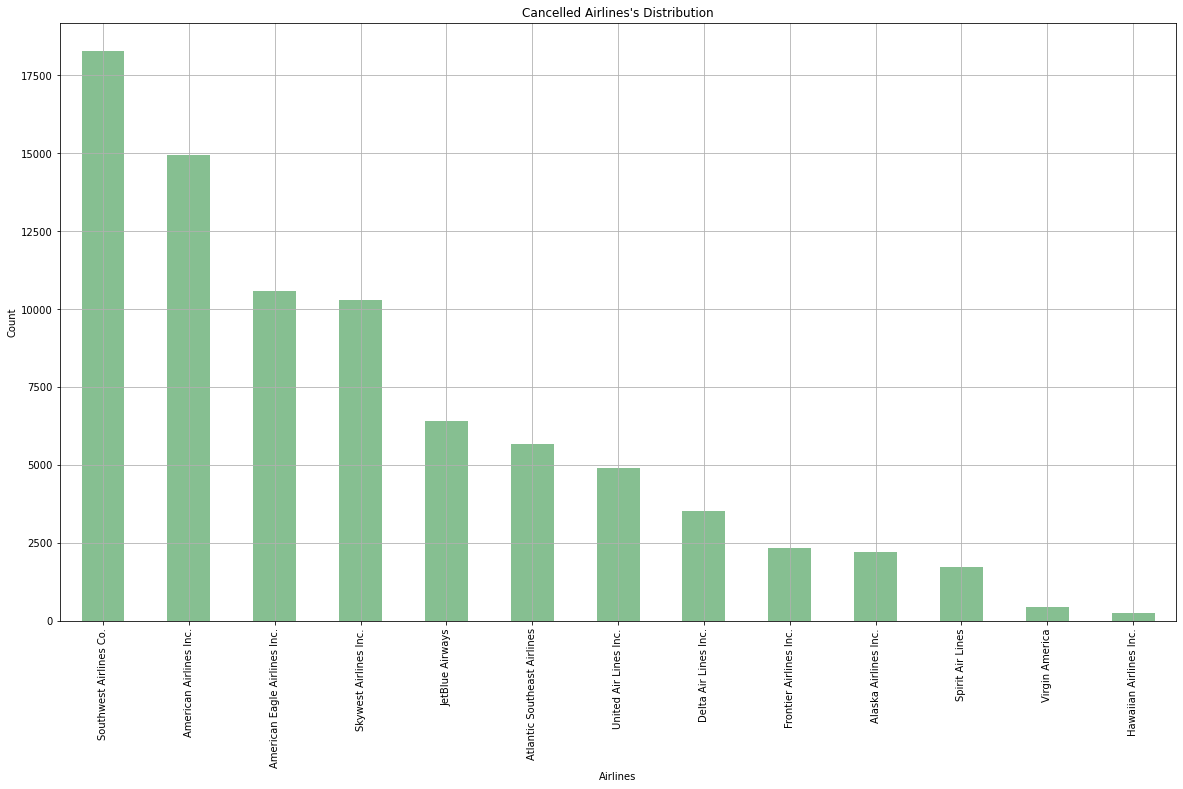

In [17]:
cancel_df = df_1.query("CANCELLED == 1.0")
cancel_distribution = cancel_df['AIRLINE'].value_counts()
#Draw plot for airlines distribution
airlines_Plt=cancel_distribution.plot(kind='bar',title='Cancelled Airlines\'s Distribution',grid=True,color='#86bf91',figsize=(20,11));
airlines_Plt.set_xlabel("Airlines");
airlines_Plt.set_ylabel("Count");

### What are the highest Cancellation Reasons Per Month
Weather Issues are the highest Cancellation situation especially in January and March, and in the other months all other Cancellation Issues Like NAS, Carrer seems to be approximately the same, except Security issues as we can see there is no security cancellation flights.

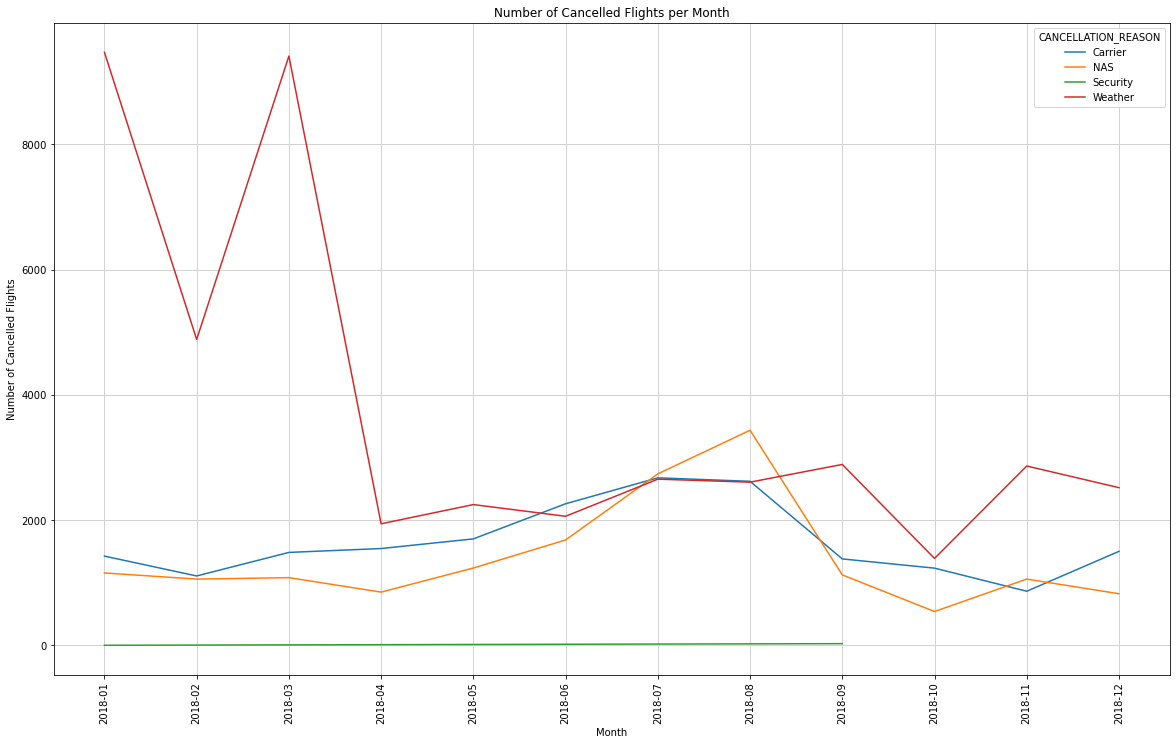

In [25]:
# using groupby to get flight count of each Cancellation Reason per month
Cancelled_Reason_Per_Month =df_1.groupby([ df_1['FL_DATE'].dt.strftime('%Y-%m'),'CANCELLATION_REASON']).AIRLINE.count().reset_index(name='Flight_count')
#plot multiple lines for Cancellation Reason
plt.figure(figsize=(20,12))
ax=sns.lineplot(data=Cancelled_Reason_Per_Month, x='FL_DATE', y='Flight_count', hue='CANCELLATION_REASON')
ax.grid(b=True, which='major', color='#d3d3d3', linewidth=1.0)
ax.grid(b=True, which='minor', color='#d3d3d3', linewidth=0.5)
# plot data
plt.xticks(rotation=90)
plt.title("Number of Cancelled Flights per Month")
plt.xlabel("Month")
plt.ylabel("Number of Cancelled Flights")
plt.show()

### Which Delay Type Have Highst Delay Average Time Per Month

Weather Issues cuazed delay more than other issues and it's increased significantly at the end of the year, then Late aircraft Issues while Security Issues and NAS Issues have least Average Time and decreasing at the end of the year.


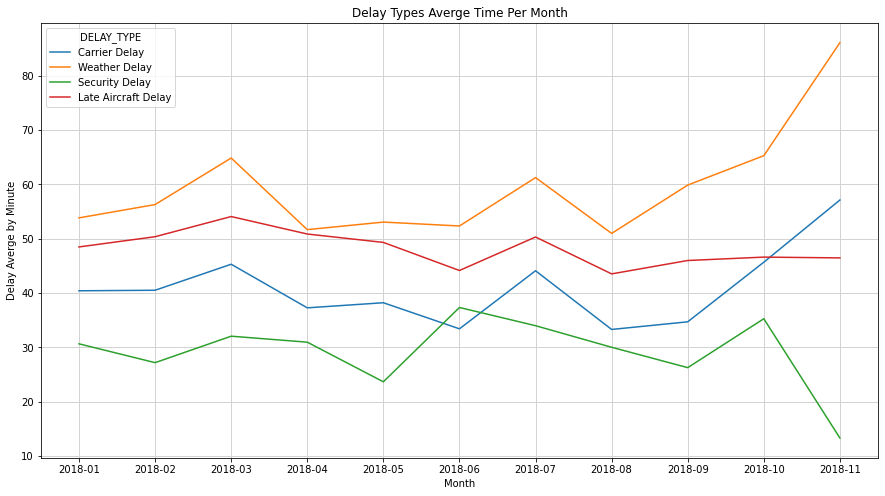

In [27]:
# using groupby to get flight count of Carrier Delay Reason per month
Carrier_df =df_1.query('CARRIER_DELAY > 0')
Carrier_Per_Month =Carrier_df.groupby([ df['FL_DATE'].dt.strftime('%Y-%m')]).CARRIER_DELAY.mean().reset_index(name='Delay_Avg')
Carrier_Per_Month['DELAY_TYPE']='Carrier Delay'
# using groupby to get flight count of Weather Delay Reason per month
Weather_df =df_1.query('WEATHER_DELAY > 0')
Weather_Per_Month =Weather_df.groupby([ df['FL_DATE'].dt.strftime('%Y-%m')]).WEATHER_DELAY.mean().reset_index(name='Delay_Avg')
Weather_Per_Month['DELAY_TYPE']='Weather Delay'
# using groupby to get flight count of NAS Delay Reason per month
NAS_df =df_1.query('NAS_DELAY > 0')
NAS_Per_Month =NAS_df.groupby([ df['FL_DATE'].dt.strftime('%Y-%m')]).NAS_DELAY.mean().reset_index(name='Delay_Avg')
NAS_Per_Month['DELAY_TYPE']='NAS Delay'
# using groupby to get flight count of Security Delay Reason per month
Security_df =df_1.query('SECURITY_DELAY > 0')
Security_Per_Month =Security_df.groupby([ df['FL_DATE'].dt.strftime('%Y-%m')]).SECURITY_DELAY.mean().reset_index(name='Delay_Avg')
Security_Per_Month['DELAY_TYPE']='Security Delay'
# using groupby to get flight count of LATE_AIRCRAFT Delay Reason per month
Late_Aircraft_df =df_1.query('LATE_AIRCRAFT_DELAY > 0')
Late_Aircraft_Per_Month =Late_Aircraft_df.groupby([ df['FL_DATE'].dt.strftime('%Y-%m')]).LATE_AIRCRAFT_DELAY.mean().reset_index(name='Delay_Avg')
Late_Aircraft_Per_Month['DELAY_TYPE']='Late Aircraft Delay'
#Concat rows
Delay_Avg_Per_Month = pd.concat([Carrier_Per_Month, Weather_Per_Month], ignore_index=True)
Delay_Avg_Per_Month = pd.concat([Delay_Avg_Per_Month, Security_Per_Month], ignore_index=True)
Delay_Avg_Per_Month = pd.concat([Delay_Avg_Per_Month, Late_Aircraft_Per_Month], ignore_index=True)
#plot multiple lines
plt.figure(figsize=(15,8))
ax=sns.lineplot(data=Delay_Avg_Per_Month, x='FL_DATE', y='Delay_Avg', hue='DELAY_TYPE')
ax.grid(b=True, which='major', color='#d3d3d3', linewidth=1.0)
ax.grid(b=True, which='minor', color='#d3d3d3', linewidth=0.5)
# plot data
plt.title("Delay Types Averge Time Per Month")
plt.xlabel("Month")
plt.ylabel("Delay Averge by Minute")
plt.show()

In [ ]:
!jupyter nbconvert ProjectUSFlightsPart2.ipynb --to slides --post serve --template output_toggle